# Punto 3

## Construcción de función de costos

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import math
import pandas as pd

In [32]:
# Se carga la data
Data = pd.DataFrame({'x1':[-2,-1,0,1,2],'x2':[0,0,1,1,3], 'y':[0,1,1,0,1]})
Data

,x1,x2,y
0,-2,0,0
1,-1,0,1
2,0,1,1
3,1,1,0
4,2,3,1


In [33]:
m, n = Data.shape

In [39]:
X = np.array(Data[['x1','x2']])
Y = np.array(Data['y'])
X_clase0 = Data[ Data['y']==0 ][['x1','x2']]
X_clase1 = Data[ Data['y']==1 ][['x1','x2']]

### Descripción del conjunto de datos

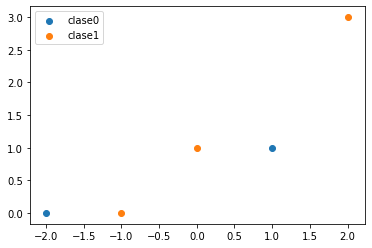

In [41]:
import matplotlib.pyplot as plt 
plt.scatter(X_clase0['x1'], X_clase0['x2'])
plt.scatter(X_clase1['x1'], X_clase1['x2'])
plt.legend(('clase0', 'clase1'))

In [47]:
# Funciones para calcular la funcion de costo
def L(x):
    m,n = x.shape
def sigmoid(z):
    return 1/(1+np.exp(-z))
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

In [44]:
Data.insert(0, 'Ones', 1)

cols = Data.shape[1]
X = Data.iloc[:,0:cols-1]
y = Data.iloc[:,cols-1:cols]

X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

### Optimización de la función de costos

In [48]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))

0.5814800569098947

In [54]:
# Minimo de la funcion de costo
print('El minimo de la función de costo está en: '+str(result[0]))
print('Su valor es: '+ str(round(cost(result[0], X, y),2)))

El minimo de la función de costo está en: [-1.06224223 -0.55942129  1.67827406]
Su valor es: 0.58


## Modelo Logistico

Se implementa el modelo logistico en base a los thetas hallados optimizando la función de costos

In [94]:
# Funcion de predicción del modelo
def prediccion(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [95]:
# Se calcula la predicción del modelo en el punto 0,2
teta = np.matrix(result[0])
predictions = prediccion(teta,[1,0,2])
print('La predicción para el punto (0,2) es '+ str(predictions[0]))

La predicción para el punto (0,2) es 1
